# Laboratorio 1 - Clasificación

### Importaciones

In [30]:
#Librerías necesarias
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Ranom seed
import numpy as np
np.random.seed(53)

# Seaborn
import seaborn as sn

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import preprocessing, feature_selection
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix,confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler


### Carga de datos

In [3]:
#Ubicacion de la base de datos
db_location = "data/202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv"

In [4]:
# Leer los datos
df = pd.read_csv(db_location, sep=";")
df

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,Black,10,101,New York,76,48,180,329,171,63,0
764,Black,2,122,New York,70,27,0,368,34,27,0
765,Red,5,121,New York,72,23,112,262,245,30,0
766,Black,1,126,New York,60,0,0,301,349,47,1


In [5]:
# Dimensiones de los datos
df.shape

(768, 11)

In [6]:
df.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

### Limpieza de datos

In [7]:
df["Pregnancies"].unique()

array(['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', '9', '11', '13',
       '15', '17', '12', '14', '-'], dtype=object)

Nos dimos cuenta que en las columnas, hay valores que deberían ser numéricos pero aparecen como objetos. En el caso de Pregnancies es porque hay valores que son '-' que en este caso asumiremos que son lo mismo que 0. 

In [8]:
df["Pregnancies"] = df["Pregnancies"].replace("-",0)
df["Pregnancies"] = pd.to_numeric(df["Pregnancies"])
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [9]:
df["Glucose"].unique()

array(['148', '85', '183', '89', '137', '116', '78', '115', '197', '125',
       '110', '168', '139', '189', '166', '100', '118', '107', '103',
       '126', '99', '196', '119', '143', '147', '97', '145', '117', '109',
       '158', '88', '92', '122', '138', '102', '90', '111', '180', '133',
       '106', '171', '159', '146', '71', '105', '101', '176', '150', '73',
       '187', '84', '44', '141', '114', '95', '129', '79', '0', '62',
       '131', '112', '113', '74', '83', '136', '80', '123', '81', '134',
       '142', '144', '93', '163', '151', '96', '155', '76', '160', '124',
       '162', '132', '120', '173', '170', '128', '108', '154', '57',
       '156', '153', '188', '152', '104', '87', '75', '179', '130', '194',
       '181', '135', '184', '140', '177', '164', '91', '165', '86', '193',
       '191', '161', '167', '77', '182', '157', '178', '61', '98', '127',
       '82', '72', '172', '94', '175', '195', '68', '186', '198', '121',
       '-', '67', '174', '199', '56', '169', '149

Después de darnos 

In [10]:
df["Glucose"] = pd.to_numeric(df["Glucose"], errors = "coerce")
df.loc[df["Glucose"] < 50 ] = np.nan

In [11]:
df["City"].value_counts()

New York    761
-             1
Name: City, dtype: int64

Tomamos la decisión de eliminar la columna de ciudad, ya que todos los valores son New York, y por lo tanto no es una columna con valores relevantes para el diagnóstico de pacientes con diabetes. 

In [12]:
del df["City"]

In [13]:
df["BloodPressure"].unique()

array(['72', '66', '64', '40', '74', '50', '0', '70', '96', '92', '80',
       '60', '84', '30', '88', '90', '94', '76', '82', '75', '58', '78',
       '68', '110', '56', nan, '85', '86', '44', '65', '108', '55', '62',
       '48', '122', '54', '52', '98', '104', '95', '46', '102', '100',
       '61', '-', '24', '38', '106', '114'], dtype=object)

In [14]:
df["BloodPressure"] = pd.to_numeric(df["BloodPressure"], errors = "coerce")
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)

In [15]:
#df.loc[df['SkinThickness'] <= 0] = np.nan
#df["SkinThickness"].value_counts()
df["SkinThickness"] = pd.to_numeric(df["SkinThickness"], errors = "coerce")
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["SkinThickness"].value_counts()

32.0    30
30.0    27
27.0    23
23.0    22
33.0    20
28.0    20
18.0    20
31.0    19
19.0    18
39.0    18
29.0    17
25.0    16
26.0    16
22.0    16
37.0    16
40.0    16
35.0    14
36.0    14
15.0    14
41.0    14
17.0    14
24.0    12
42.0    11
20.0    11
13.0    11
21.0    10
34.0     8
46.0     8
38.0     7
12.0     7
11.0     6
16.0     6
45.0     6
43.0     6
14.0     6
10.0     5
44.0     5
48.0     4
47.0     4
50.0     3
49.0     3
8.0      2
54.0     2
7.0      2
52.0     2
63.0     1
56.0     1
51.0     1
60.0     1
99.0     1
Name: SkinThickness, dtype: int64

In [16]:
df["Insulin"].value_counts()

0      368
105     11
140      9
130      9
120      8
      ... 
159      1
272      1
846      1
485      1
415      1
Name: Insulin, Length: 187, dtype: int64

In [17]:
df["Insulin"] = pd.to_numeric(df["Insulin"], errors = "coerce")

In [18]:
df["Insulin"].unique()

array([  0.,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142.,  nan, 128.,  38., 100.,  90.,
       270.,  71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,
        18., 135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92.,
       325.,  63., 284., 119., 204., 155., 485.,  53., 114., 105., 285.,
       156.,  78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,
        87., 271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194.,
       680., 402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,
        75.,  74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,
        85., 231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167.,
       249., 293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196.,
       415., 275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,
        95., 237., 191., 328., 250., 480., 265., 19

In [19]:
df["BMI"].unique()

array([336., 266., 233., 281., 431., 256.,  31., 353., 305.,   0., 376.,
        38., 271., 301., 258.,  30., 458., 296., 433., 346., 393., 354.,
       398.,  29., 366., 311., 394., 232., 222., 341.,  36., 316., 248.,
       199., 276.,  24., 332., 329., 382., 371.,  34., 402., 227., 454.,
       274.,  42., 297.,  28., 391., 194., 242., 244., 337., 347.,  23.,
       377., 468., 405., 415.,  nan, 254., 328., 325., 427., 196., 289.,
       286., 434., 351.,  32., 326., 432.,  25., 224., 293., 246., 488.,
       324., 385., 265., 191., 467., 238., 247., 339., 204., 287., 497.,
        39., 261., 225., 396., 295., 343., 374., 333., 312., 282., 532.,
       342., 268.,  55., 429., 345., 279., 383., 211., 338., 308., 369.,
       395., 273., 219., 406., 479.,  50., 252., 409., 372., 442., 299.,
       319., 284., 435., 327., 671.,  45., 349., 359., 226., 331., 304.,
       523., 243., 229., 348., 309., 401., 239., 375., 355., 277., 428.,
       426., 418., 358., 378., 288., 236., 357., 36

In [20]:
df.loc[df['BMI'] < 100] = np.nan
df["BMI"].value_counts()

316.0    12
312.0    12
324.0    10
333.0    10
301.0     9
         ..
388.0     1
386.0     1
408.0     1
201.0     1
671.0     1
Name: BMI, Length: 222, dtype: int64

In [21]:
df

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6.0,148.0,72.0,35.0,0.0,336.0,627,50.0,1
1,Black,1.0,85.0,66.0,29.0,0.0,266.0,351,31.0,0
2,Red,8.0,183.0,64.0,NaN,0.0,233.0,672,32.0,1
3,Black,1.0,89.0,66.0,23.0,94.0,281.0,167,21.0,0
4,Black,0.0,137.0,40.0,35.0,168.0,431.0,2288,33.0,1
...,...,...,...,...,...,...,...,...,...,...
763,Black,10.0,101.0,76.0,48.0,180.0,329.0,171,63.0,0
764,Black,2.0,122.0,70.0,27.0,0.0,368.0,34,27.0,0
765,Red,5.0,121.0,72.0,23.0,112.0,262.0,245,30.0,0
766,Black,1.0,126.0,60.0,NaN,0.0,301.0,349,47.0,1


In [22]:
df["DiabetesPedigreeFunction"] = pd.to_numeric(df["DiabetesPedigreeFunction"], errors = "coerce")

In [23]:
df["Age"] = pd.to_numeric(df["Age"], errors = "coerce")
df.loc[df['Age'] > 81] = np.nan

In [24]:
df = df.dropna()

In [25]:
le = preprocessing.LabelEncoder()
df["Hair color"]=le.fit_transform(df["Hair color"])

<ipython-input-25-3d3e48793e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hair color"]=le.fit_transform(df["Hair color"])


In [26]:
df

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,6.0,148.0,72.0,35.0,0.0,336.0,627.0,50.0,1
1,0,1.0,85.0,66.0,29.0,0.0,266.0,351.0,31.0,0
3,0,1.0,89.0,66.0,23.0,94.0,281.0,167.0,21.0,0
4,0,0.0,137.0,40.0,35.0,168.0,431.0,2288.0,33.0,1
8,0,2.0,197.0,70.0,45.0,543.0,305.0,158.0,53.0,1
...,...,...,...,...,...,...,...,...,...,...
760,2,2.0,88.0,58.0,26.0,16.0,284.0,766.0,22.0,0
763,0,10.0,101.0,76.0,48.0,180.0,329.0,171.0,63.0,0
764,0,2.0,122.0,70.0,27.0,0.0,368.0,34.0,27.0,0
765,2,5.0,121.0,72.0,23.0,112.0,262.0,245.0,30.0,0


In [27]:
df.describe()

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.205021,3.512552,121.458159,71.615063,29.305439,117.665272,330.175732,458.525105,31.512552
std,0.571709,3.356968,30.702149,12.304417,10.702515,124.429536,69.090972,342.549680,10.711328
min,0.000000,0.000000,56.000000,24.000000,7.000000,0.000000,182.000000,1.000000,21.000000
25%,0.000000,1.000000,99.000000,64.000000,21.000000,15.250000,278.000000,231.000000,23.000000
50%,0.000000,2.000000,116.000000,72.000000,29.000000,94.000000,331.500000,376.500000,28.000000
75%,0.000000,5.000000,142.000000,80.000000,36.000000,166.750000,371.750000,637.000000,38.000000
max,2.000000,17.000000,199.000000,110.000000,99.000000,846.000000,671.000000,2329.000000,81.000000


Text(0.5, 1.0, 'Pearson correlation')

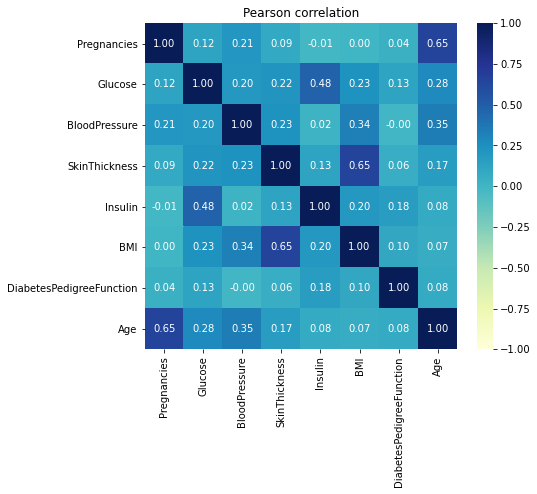

In [32]:
corr_matrix=df.drop(columns=["Outcome","Hair color"])
corr_matrix = corr_matrix.corr(method="pearson")
fig, ax = plt.subplots(figsize=(7,6)) 
sn.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.title("Pearson correlation")
#sn.heatmap(covMatrix, annot=True, fmt='g', cmap="YlGnBu")
#plt.show()

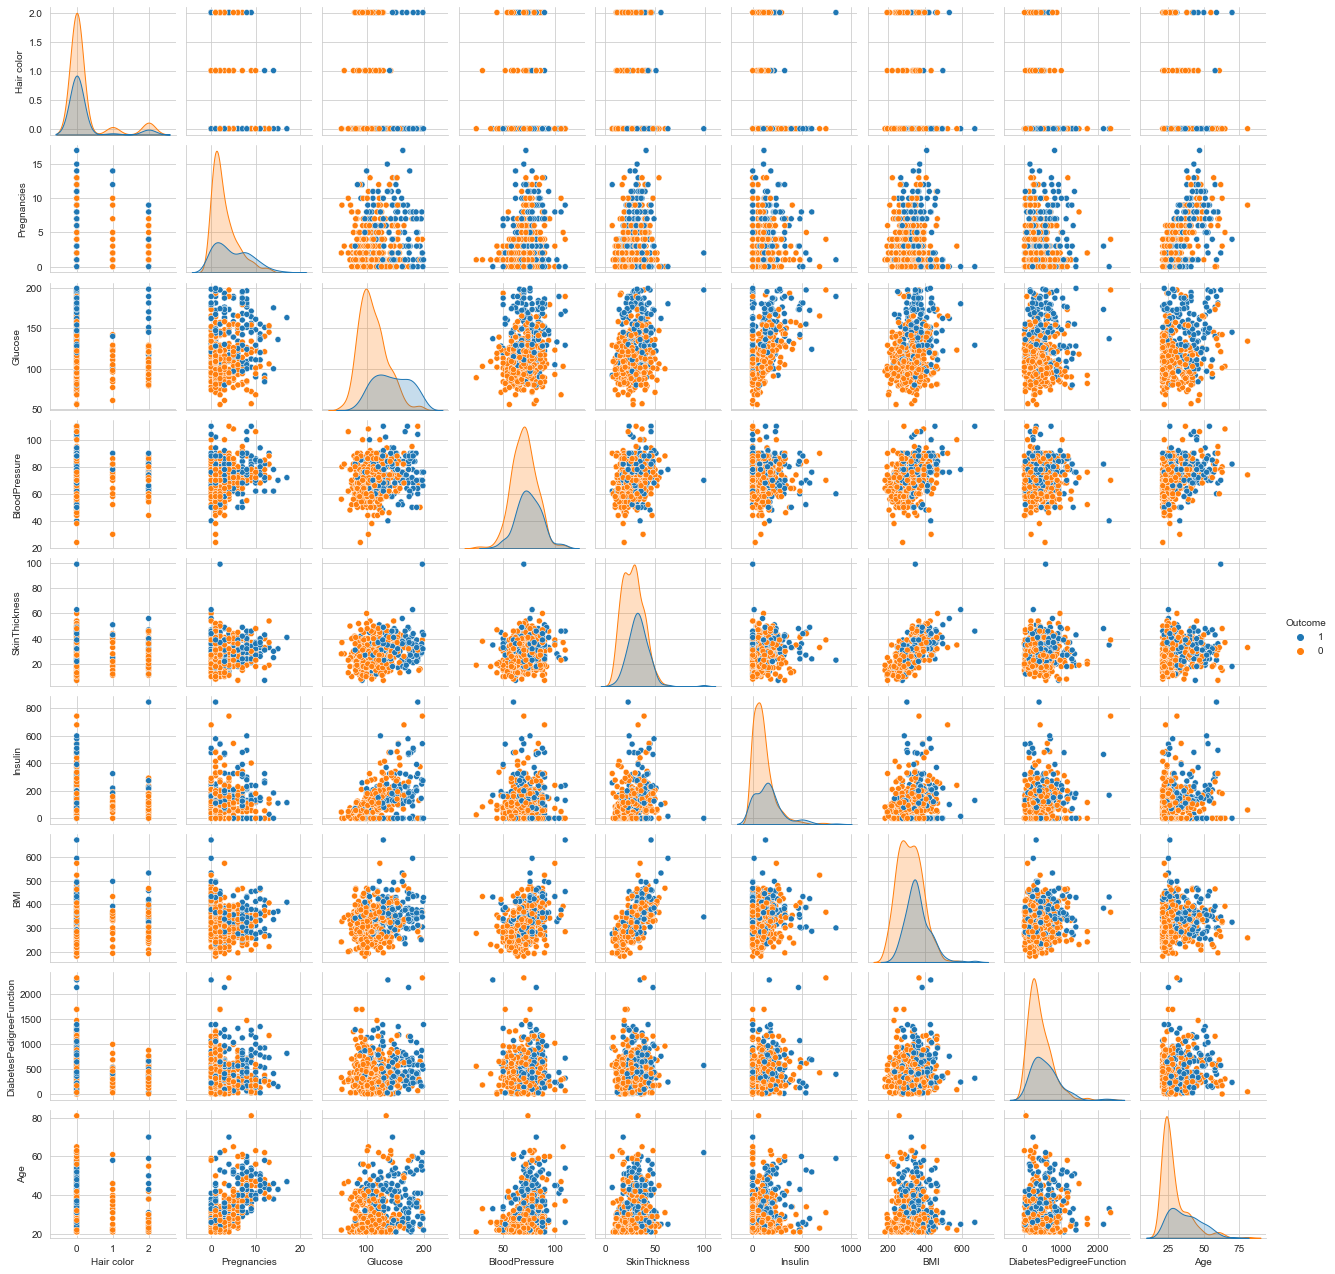

In [34]:
sn.set_style("whitegrid");
sn.pairplot(df, hue="Outcome", height=2);
plt.show()

In [35]:
df["Outcome"].value_counts(normalize=True)

0    0.669456
1    0.330544
Name: Outcome, dtype: float64

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
clases=df.columns
df = pd.DataFrame(df_scaled)
df.columns=clases
df

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.268900,0.483333,1.0
1,0.0,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.150344,0.166667,0.0
2,0.0,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.071306,0.000000,0.0
3,0.0,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.982388,0.200000,1.0
4,0.0,0.117647,0.986014,0.534884,0.413043,0.641844,0.251534,0.067440,0.533333,1.0
...,...,...,...,...,...,...,...,...,...,...
473,1.0,0.117647,0.223776,0.395349,0.206522,0.018913,0.208589,0.328608,0.016667,0.0
474,0.0,0.588235,0.314685,0.604651,0.445652,0.212766,0.300613,0.073024,0.700000,0.0
475,0.0,0.117647,0.461538,0.534884,0.217391,0.000000,0.380368,0.014175,0.100000,0.0
476,1.0,0.294118,0.454545,0.558140,0.173913,0.132388,0.163599,0.104811,0.150000,0.0


### Separación de datos

In [69]:
Y = df["Outcome"]
X = df.drop(columns=["Outcome","Hair color","DiabetesPedigreeFunction"])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=53, shuffle=True)
ros = RandomOverSampler(random_state=53)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts(normalize=True)

In [70]:
selector.get_support()

array([ True,  True,  True,  True, False,  True, False,  True])

In [71]:
## Anova
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=6).fit(X_train,y_train)
features=list(X.columns)
print(features)
print(selector.get_support())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
[ True  True  True  True False  True  True]


### Árbol

### Construcción del Modelo

In [72]:
arbol = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [73]:
arbol = arbol.fit(X_train, y_train)

In [74]:
y_pred = arbol.predict(X_test)

<AxesSubplot:>

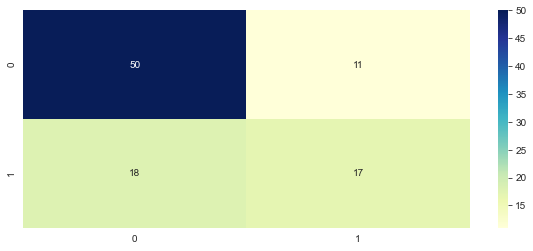

In [75]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True, cmap="YlGnBu")

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        61
         1.0       0.61      0.49      0.54        35

    accuracy                           0.70        96
   macro avg       0.67      0.65      0.66        96
weighted avg       0.69      0.70      0.69        96



In [77]:
importancia = arbol.feature_importances_
importancia

array([0.05107842, 0.30170961, 0.09005709, 0.08579516, 0.11707992,
       0.16157757, 0.19270223])

In [78]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo 

,Atributo,Importancia
0,Glucose,0.301710
1,Age,0.192702
2,BMI,0.161578
3,Insulin,0.117080
4,BloodPressure,0.090057
5,SkinThickness,0.085795
6,Pregnancies,0.051078


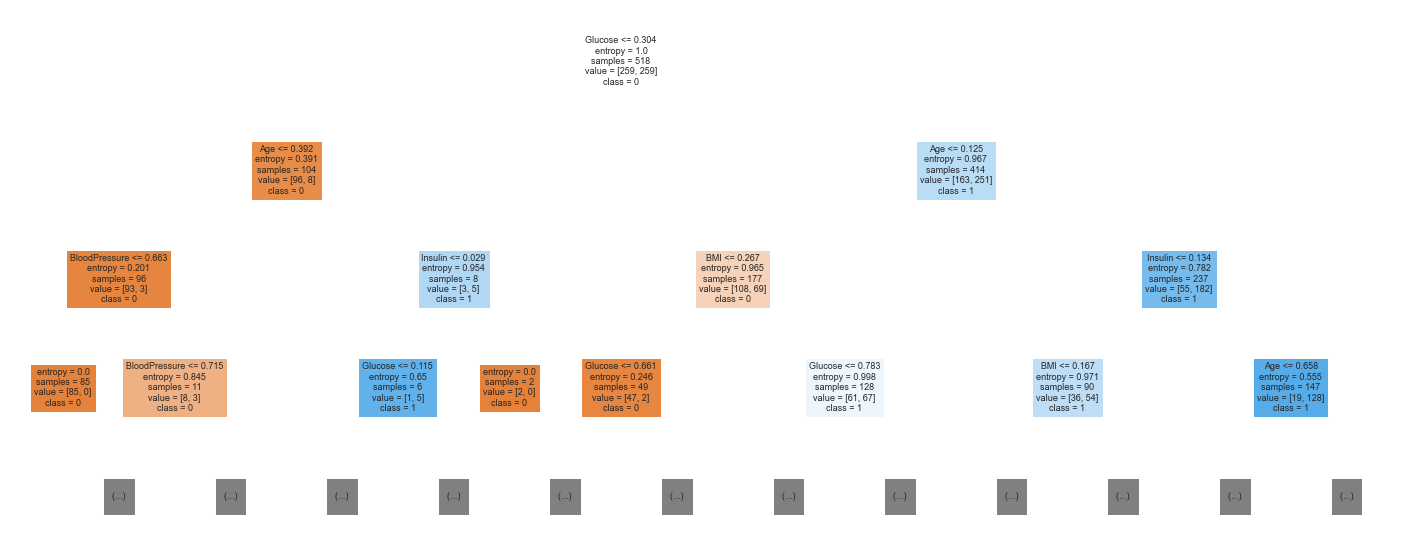

In [79]:
fig = plt.figure(figsize = (25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9) 

### Calibración del Modelo

In [80]:
particiones = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [81]:
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[4,6,8,10,20], 'min_samples_split':[2,3,4,5]}

In [82]:
mejor = GridSearchCV(arbol, param_grid, cv = particiones)
mejor.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [83]:
mejor.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

In [84]:
arbolf = mejor.best_estimator_
y_pred_train = arbolf.predict(X_train)
y_pred_test = arbolf.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.94
Exactitud sobre test: 0.72


In [85]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78        61
         1.0       0.62      0.57      0.60        35

    accuracy                           0.72        96
   macro avg       0.70      0.69      0.69        96
weighted avg       0.71      0.72      0.72        96



### KNN

### Construcción del modelo

In [86]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train )

KNeighborsClassifier(n_neighbors=3)

<AxesSubplot:>

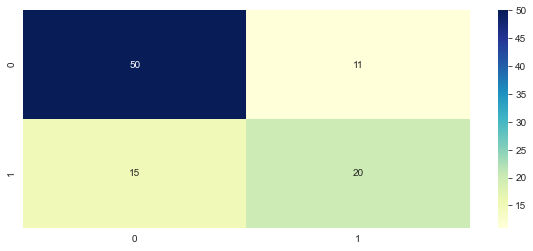

In [87]:
predicted=neigh.predict(X_test)
cm =confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True, cmap="YlGnBu")

In [88]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        61
         1.0       0.65      0.57      0.61        35

    accuracy                           0.73        96
   macro avg       0.71      0.70      0.70        96
weighted avg       0.72      0.73      0.73        96



### Calibración del modelo

In [89]:
params = {}
params["n_neighbors"]=[2,3,5,7,10,15,20,25,30,35]
params["weights"]=["uniform","distance"]
params["algorithm"]=["ball_tree", "kd_tree", "brute"]


print(params)
best_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv= 3, n_jobs=-1)
best_model.fit(X_train, y_train)

{'n_neighbors': [2, 3, 5, 7, 10, 15, 20, 25, 30, 35], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 5, 7, 10, 15, 20, 25, 30, 35],
                         'weights': ['uniform', 'distance']})

In [90]:
best_model.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 35, 'weights': 'distance'}

<AxesSubplot:>

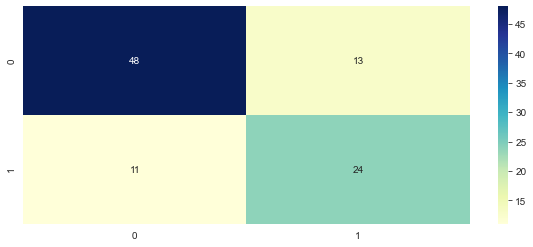

In [91]:
predicted= best_model.predict(X_test)
cm =confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True, cmap="YlGnBu")

In [92]:
print("Accuracy",accuracy_score(y_test, predicted).round(3))
print(classification_report(y_test, predicted))

Accuracy 0.75
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        61
         1.0       0.65      0.69      0.67        35

    accuracy                           0.75        96
   macro avg       0.73      0.74      0.73        96
weighted avg       0.75      0.75      0.75        96



### Random Forest Classifier

### Construccion del modelo

In [96]:
randomForest = RandomForestClassifier(max_depth=3, random_state = 0)
randomForest.fit(X_train,y_train, sample_weight=None)

RandomForestClassifier(max_depth=3, random_state=0)

<AxesSubplot:>

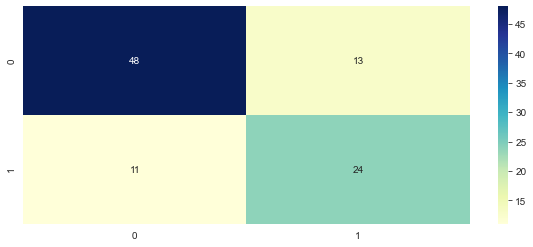

In [97]:
predictedRandomForest = randomForest.predict(X_test)
cm2 = confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,4))
sn.heatmap(cm2, annot=True, cmap="YlGnBu")

In [98]:
print(classification_report(y_test, predictedRandomForest))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81        61
         1.0       0.68      0.66      0.67        35

    accuracy                           0.76        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.76      0.76      0.76        96



In [99]:
importanciaRF = randomForest.feature_importances_
importanciaRF

array([0.06390841, 0.34655621, 0.02723571, 0.14585478, 0.06602282,
       0.13164526, 0.21877681])

In [100]:
importancia_atributoRF = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importanciaRF})
importancia_atributoRF = importancia_atributoRF.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributoRF

,Atributo,Importancia
0,Glucose,0.346556
1,Age,0.218777
2,SkinThickness,0.145855
3,BMI,0.131645
4,Insulin,0.066023
5,Pregnancies,0.063908
6,BloodPressure,0.027236


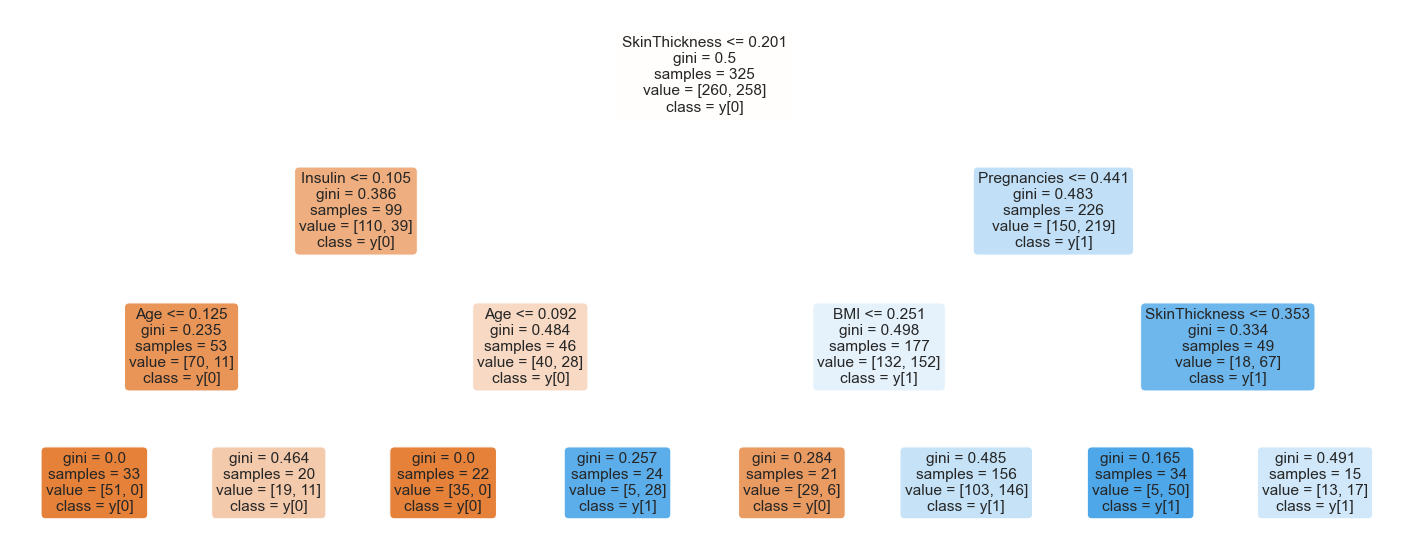

In [101]:
figRF = plt.figure(figsize = (25,10))
treeRF = tree.plot_tree(randomForest.estimators_[0],feature_names= X.columns, class_names = True,filled=True, impurity=True, 
          rounded=True )

### Calibración del modelo

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(randomForest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.4min


In [ ]:
gridF.best_params_

In [ ]:
arbolRF = gridF.best_estimator_
y_pred_trainRF = arbolRF.predict(X_train)
y_pred_testRF = arbolRF.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_trainRF))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_testRF))

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_testRF)
plt.figure(figsize = (10,4))
sn.heatmap(cm2, annot=True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_pred_testRF))